<a href="https://colab.research.google.com/github/Nitin-Flavier13/Pytorch-For-DeepLearning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import torch
from torch import nn
import matplotlib.pyplot as plt


### Data Preparing and Loading

Why do we unsqueeze at dim=1
  - because of this reason   
    RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x33 and 1x1), where X * w so X has to be 1 dim in its last dimension

In [31]:
# Create known paramters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

x = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * x + bias
print(y)
# print(x)

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


In [32]:
y[:10], len(x),len(y)

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [33]:
train_split = int(0.8 * len(x))
X_train,y_train = x[:train_split], y[:train_split]
X_test,y_test = x[train_split:],y[train_split:]


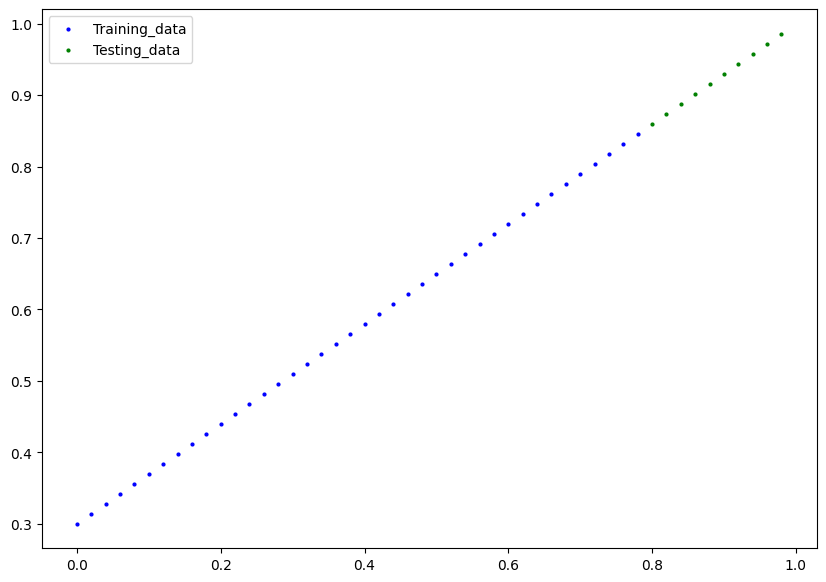

In [34]:
def plot_pred(train_data=X_train,y_train=y_train,test_data=X_test,y_test=y_test,predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,y_train,c="b",s=4,label="Training_data")
    plt.scatter(test_data,y_test,c="g",s=4,label="Testing_data")

    if predictions is not None:
      plt.scatter(test_data,predictions,c='r',s=4,label="Predicted Data")

    plt.legend()

plot_pred()

### Building basic models

- torch.nn: has all the materials for computational graphs.
- nn.Module: base class for all neural network modules.
- nn.Parameter: What parameters should our model try and learn.
- torch.optim: we can use optimizers from here, these help with gradient descent.

In [35]:
# Create Linear Regression Model
import torch
from torch import nn
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(42)
    self.weights = nn.Parameter(torch.rand(1,
                                requires_grad=True, # this means dL/dw will be calculated
                                dtype=torch.float))
    torch.manual_seed(43)
    self.bias = nn.Parameter(torch.rand(1,
                             requires_grad=True,    # this means dL/db will be calculated
                             dtype=torch.float))
  # Forward method to define the computation in the model, we have overridden the super class forward
  def forward(self,x : torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias



In [36]:
model_0 = LinearRegression()

print(model_0.state_dict())
print(list(model_0.parameters()))

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.4540]))])
[Parameter containing:
tensor([0.8823], requires_grad=True), Parameter containing:
tensor([0.4540], requires_grad=True)]


So we will train the neural network which will get our parameters close to weight,bias as for the above train_data

In [37]:
weight,bias

(0.7, 0.3)

- Inference Mode:
  - InferenceMode reduces overhead by disabling two Autograd mechanisms - version counting and metadata tracking - on all tensors created here ("inference tensors").
  - Main Benefit of torch.inference_mode()
  It optimizes tensor memory allocation by marking tensors as read-only and completely disabling autograd, which results in faster execution and lower memory usage.


In [38]:
# making prediction using torch.inference_mode()
# in this mode the gradients are not tracked hence having faster predictions, as it is tracking less data.

with torch.inference_mode():
  y_pred = model_0(X_test)

y_pred

tensor([[1.1598],
        [1.1774],
        [1.1951],
        [1.2127],
        [1.2304],
        [1.2480],
        [1.2657],
        [1.2833],
        [1.3009],
        [1.3186]])

In [39]:
y_pred_2 = model_0(X_test)
y_pred_2

tensor([[1.1598],
        [1.1774],
        [1.1951],
        [1.2127],
        [1.2304],
        [1.2480],
        [1.2657],
        [1.2833],
        [1.3009],
        [1.3186]], grad_fn=<AddBackward0>)

In [40]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

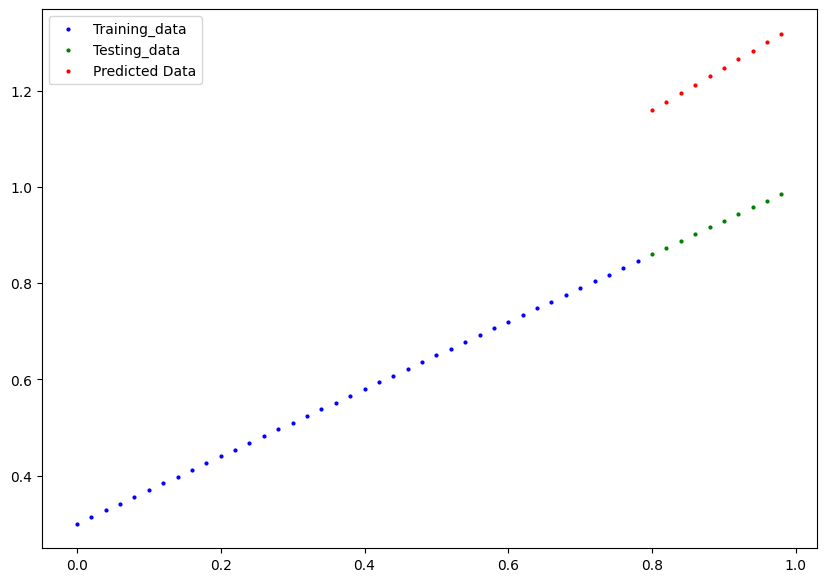

In [41]:
plot_pred(predictions=y_pred)

In [42]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.4540], requires_grad=True)]

- model_0.train()   
  In PyTorch, models can be in training or evaluation mode:
    - Training mode (model.train()): Enables features like dropout and batch normalization.
    - Evaluation mode (model.eval()): Disables dropout and batch normalization to ensure deterministic behavior during inference.

- optimizer.zero_grad():
  - Why? In PyTorch, gradients accumulate (by default) in each training step.
  - If we don’t reset them, old gradients will interfere with new ones.
  - What does this do? It resets all stored gradients to zero before computing new gradients.

- loss.backward():
  - This performs backpropagation, computing gradients of the loss with respect to the model’s parameters (weights & biases).
  - PyTorch automatically differentiates the loss using autograd.

- optimizer.step():
  - This updates the model’s parameters using the computed gradients.
  - The optimizer (e.g., SGD, Adam) adjusts the model’s weights based on the gradients computed in loss.backward().

- model.eval():
  it switches the model from training mode to evaluation mode.
  - Disables Training-Specific Layers:
    - Dropout: In training mode, dropout randomly zeroes some activations to help prevent overfitting. In evaluation mode, dropout is disabled so that all neurons are active.
    - During training, batch norm layers compute running statistics (mean and variance) from the current batch. In evaluation mode, they use the stored running statistics computed during training, ensuring consistency.
  - Usage Context:  
      Typically, after you finish training (or during validation/testing), we call model.eval() before running inference. This ensures you get accurate and consistent predictions.

In [43]:
print(model_0.weights.item())
print(model_0.bias)

0.8822692632675171
Parameter containing:
tensor([0.4540], requires_grad=True)


Little info on train() vs inference_mode():
  - Autograd Graph Construction:
      During the forward pass in training mode, PyTorch's autograd engine records all operations and stores intermediate tensors (metadata) needed for backpropagation. This means that every operation you perform in the forward method is tracked, so when you call loss.backward(), the engine can compute the gradients by traversing this computation graph.

      * Hence in inference_mode when we do model(X_test) all the intermediate output tensors are not stored hence we have saved memory and time (as we are not doing any operation to store the intermediate tensors).

In [44]:
# Train the model
# optimizers takes into account the loss of the model and adjusts the the model parameters.
# learning rate: the speed at which the weights are updated

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),lr=0.001)

# train our model

epochs = 1000 # model goes through the entire dataset (all datapoints are fed into the model)
weights = []
loss_values = []
val_loss_values = []
epoch_count = [i for i in range(1,epochs+1)]

for epoch in range(epochs):
  # setting model in train mode
  model_0.train()

  y_pred = model_0(X_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()

  loss_values.append(loss.item())

  # # Print parameters before the update
  # print("Parameters BEFORE optimizer.step():")
  # for name, param in model_0.named_parameters():
  #     print(f"{name}:\n{param.data}\n")

  # perform back-propagation on the loss with respect to the params
  loss.backward()

  # # print the gradients for all the parameters like dL/dw, dL/db
  # print(f"Printing Gradients for the {epoch} epoch:")
  # for name,param in model_0.named_parameters():
  #   if param.grad is not None:
  #     print(name,param.grad)
  # print(end="\n\n")

  # updates the model parameters using the computed gradients
  optimizer.step()

  # print("Parameter After optimizer.step():")
  for name, param in model_0.named_parameters():
    # print(f"{name}:\n{param.data}\n")
    if name == "weights":
      weights.append(param.data.item())

  # turning on the inference mode for testing our model
  model_0.eval()

  with torch.inference_mode():
    # Forward pass on your validation or test data
    y_pred = model_0(X_test)
    val_loss = loss_fn(y_pred,y_test)
    val_loss_values.append(val_loss.item())




In [45]:
print(weight,bias)
print(model_0.weights.item(),model_0.bias.item())

0.7 0.3
0.7064008712768555 0.2972620129585266


In [46]:
print(loss_values)
print(weights)
print(epochs)

[0.05241972208023071, 0.051776640117168427, 0.05113762617111206, 0.05050273984670639, 0.04987209662795067, 0.04924570769071579, 0.048623666167259216, 0.04800601676106453, 0.047392845153808594, 0.046784184873104095, 0.04618009552359581, 0.04558064416050911, 0.04498586803674698, 0.0443958155810833, 0.04381052404642105, 0.04323003813624382, 0.04265439882874489, 0.04208365082740784, 0.041517823934555054, 0.04095694422721863, 0.04040103033185005, 0.03985012695193291, 0.03930424526333809, 0.03876340016722679, 0.038227617740631104, 0.037696901708841324, 0.03717125579714775, 0.036650706082582474, 0.03613525629043579, 0.035624921321868896, 0.0351196750998497, 0.0346195325255394, 0.034124474972486496, 0.03363453596830368, 0.03314967826008797, 0.03266988694667816, 0.03219517692923546, 0.03172551840543747, 0.0312609001994133, 0.030801307410001755, 0.030346736311912537, 0.02989714778959751, 0.029452551156282425, 0.02901288866996765, 0.02857816591858864, 0.028148353099822998, 0.027723422273993492, 0

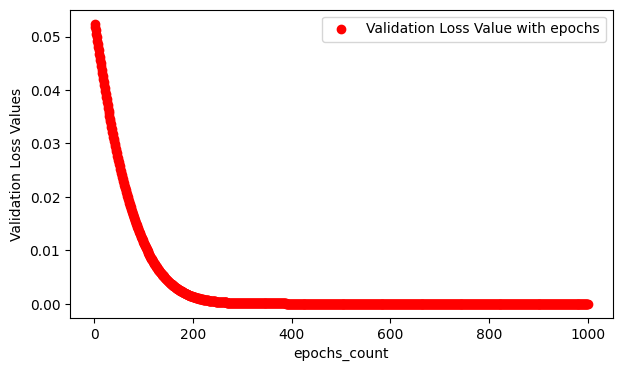

In [47]:
plt.figure(figsize=(7,4))
plt.scatter(x=epoch_count,y=loss_values,c="r",label="Validation Loss Value with epochs")
plt.xlabel('epochs_count')
plt.ylabel('Validation Loss Values')
plt.legend()
plt.show()

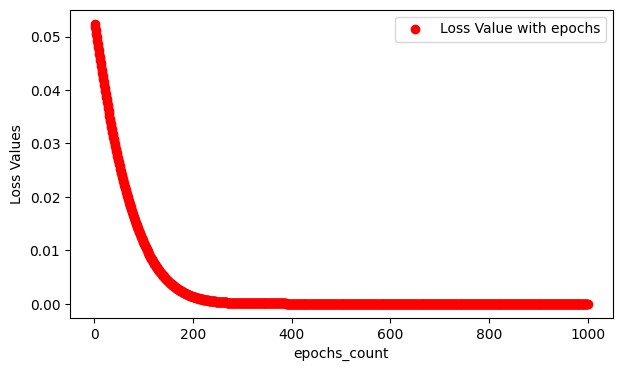

In [48]:
plt.figure(figsize=(7,4))
plt.scatter(x=epoch_count,y=loss_values,c="r",label="Loss Value with epochs")
plt.xlabel('epochs_count')
plt.ylabel('Loss Values')
plt.legend()
plt.show()

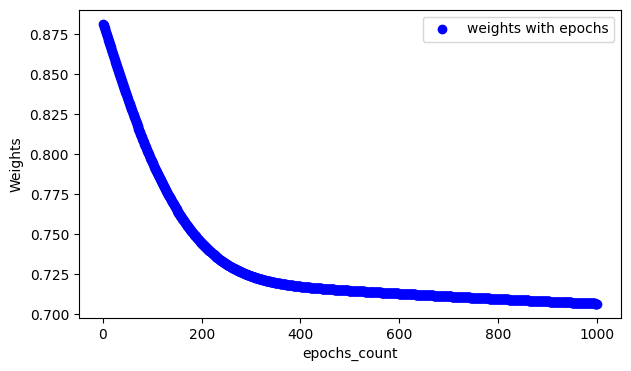

In [49]:
plt.figure(figsize=(7,4))
plt.scatter(x=epoch_count,y=weights,c="b",label="weights with epochs")
plt.xlabel('epochs_count')
plt.ylabel('Weights')
plt.legend()
plt.show()

So initially weight was set to something 0.8xx with training we built the regression line having weight of clode to 0.7

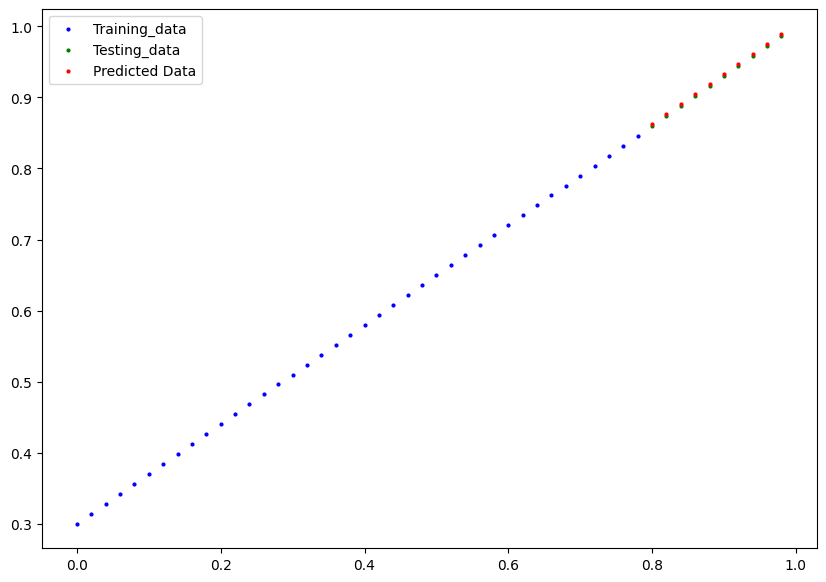

In [50]:
with torch.inference_mode():
  y_pred = model_0(X_test)

plot_pred(predictions=y_pred)

### Save the model

- 'torch.save()' -> saving Pytorch object into pickle files.
- 'torch.load()' -> allows one to load saved Pytorch Object.
- 'torch.nn.Module.load_state_dict()' -> load the model state

In [51]:
from pathlib import Path

# create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#creating model_save_path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/01_pytorch_workflow_model_0.pth')

In [52]:
# Save the model state
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Load the Model

In [53]:
loaded_model_0 = LinearRegression()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH,weights_only=True))

<All keys matched successfully>

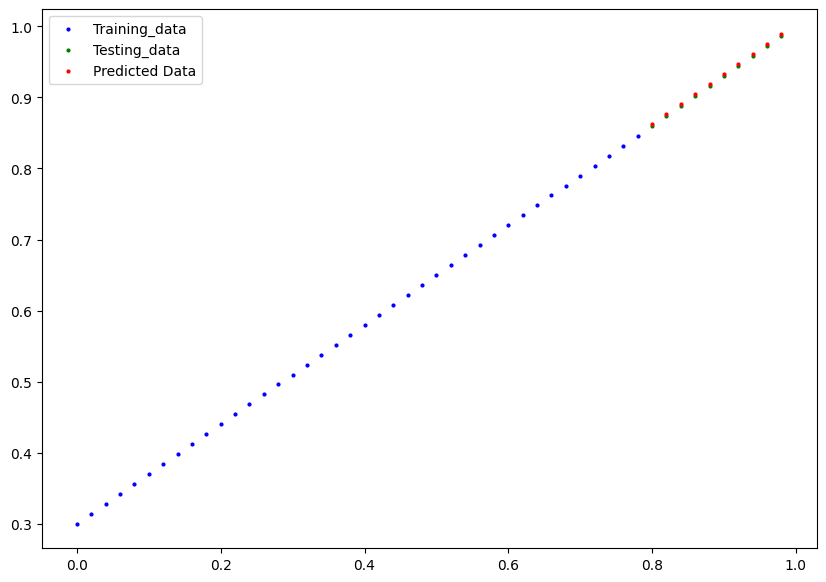

In [54]:
# just testing our loaded data

with torch.inference_mode():
  y_pred = loaded_model_0(X_test)
  plot_pred(predictions=y_pred)

### Putting all together

In [55]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [56]:
# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [57]:
!nvidia-smi

Tue Feb 18 08:31:26 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P0             27W /   70W |     158MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [58]:
bias = 0.2
weight = 0.5

X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = X*weight + bias
y[0:10]

tensor([[0.2000],
        [0.2100],
        [0.2200],
        [0.2300],
        [0.2400],
        [0.2500],
        [0.2600],
        [0.2700],
        [0.2800],
        [0.2900]])

In [59]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=40)

In [60]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [61]:
# Building the model
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    # use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,out_features=1)

  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
print(model_1.state_dict())


OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])


In [62]:
next(model_1.parameters()).device

device(type='cpu')

In [63]:
model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [64]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [65]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup the optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

- model.eval()  
    Purpose:
    This method sets your model to evaluation mode. It changes the behavior of certain layers such as:

    - Dropout: It stops randomly zeroing activations.  
    - Batch Normalization: It uses running statistics (computed during training) instead of the statistics of the current batch.
    
    What It Does:  
    It doesn’t turn off gradient computation. Gradients are still computed if you call operations that require them unless you wrap your code with torch.no_grad() or torch.inference_mode(). It only changes the behavior of certain layers.

In [66]:
epochs = 200

for epoch in range(epochs):
  model_1.train()

  # Forward Pass
  y_pred = model_1(X_train)

  loss_train = loss_fn(y_pred,y_train)

  optimizer.zero_grad()

  loss_train.backward()

  optimizer.step()

  model_1.eval()

  with torch.inference_mode():
    y_pred_test = model_1(X_test)
    loss_test = loss_fn(y_pred_test,y_test)

  if epoch%20 == 0:
    print(f"Epoch: {epoch} | Train Loss: {loss_train} | Test Loss: {loss_test}")


Epoch: 0 | Train Loss: 0.7568261623382568 | Test Loss: 0.7526304721832275
Epoch: 20 | Train Loss: 0.5108625292778015 | Test Loss: 0.5036759972572327
Epoch: 40 | Train Loss: 0.26489901542663574 | Test Loss: 0.25472158193588257
Epoch: 60 | Train Loss: 0.018935415893793106 | Test Loss: 0.008238766342401505
Epoch: 80 | Train Loss: 0.0052123721688985825 | Test Loss: 0.007310826797038317
Epoch: 100 | Train Loss: 0.0052123721688985825 | Test Loss: 0.007310826797038317
Epoch: 120 | Train Loss: 0.0052123721688985825 | Test Loss: 0.007310826797038317
Epoch: 140 | Train Loss: 0.0052123721688985825 | Test Loss: 0.007310826797038317
Epoch: 160 | Train Loss: 0.0052123721688985825 | Test Loss: 0.007310826797038317
Epoch: 180 | Train Loss: 0.0052123721688985825 | Test Loss: 0.007310826797038317


### Note
The error below says that the tensor type in GPU cant be converted into numpy, so first we need to copy that tensor into our cpu/host memory

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

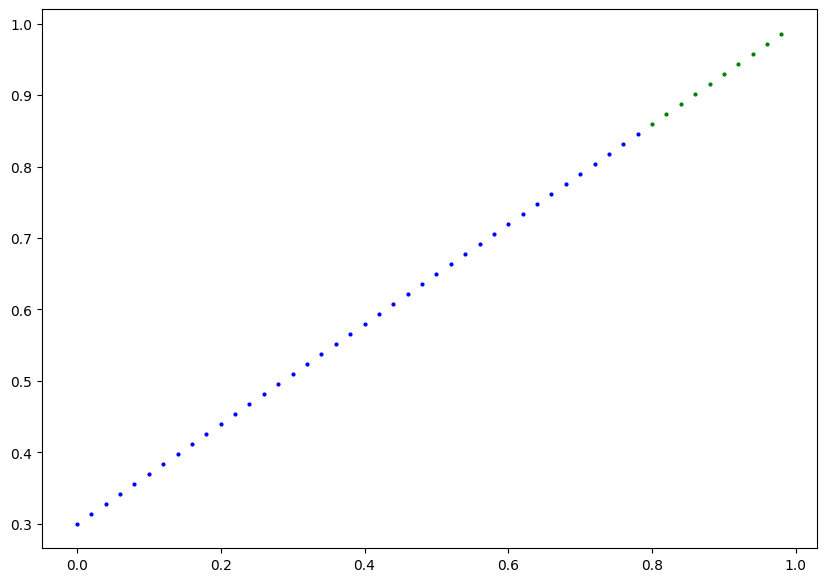

In [70]:
# lets get our predictions
model_1.eval()

with torch.inference_mode():
  y_pred = model_1(X_test)

plot_pred(predictions=y_pred)

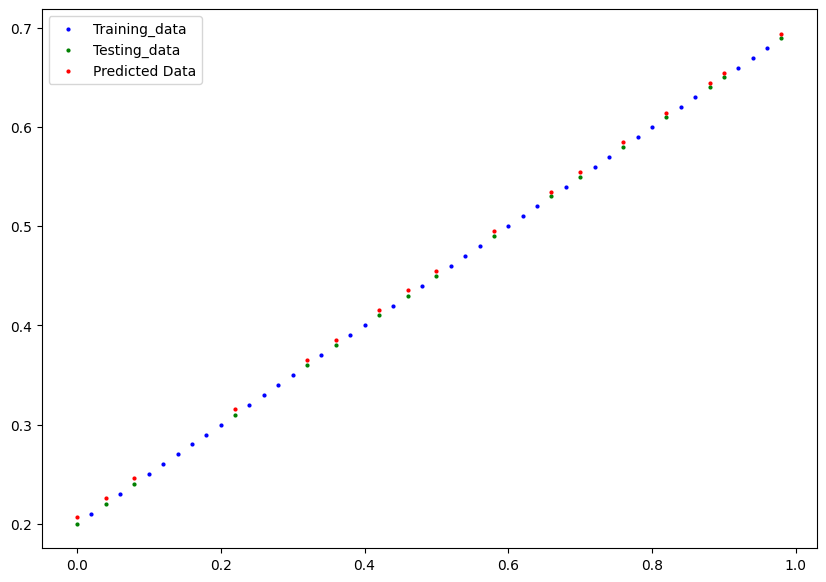

In [74]:
y_pred_cpu = y_pred.cpu().numpy()
# y_pred_cpu
plot_pred(train_data=X_train.cpu().numpy(),y_train=y_train.cpu().numpy(),test_data=X_test.cpu().numpy(), y_test=y_test.cpu().numpy(),predictions=y_pred_cpu)

In [75]:
# save the model

from pathlib import Path

# create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#creating model_save_path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/01_pytorch_workflow_model_1.pth')

In [81]:
# Save the model state
torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)

In [82]:
# load model
loaded_model_2 = LinearRegressionModelV2()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH,weights_only=True))

<All keys matched successfully>

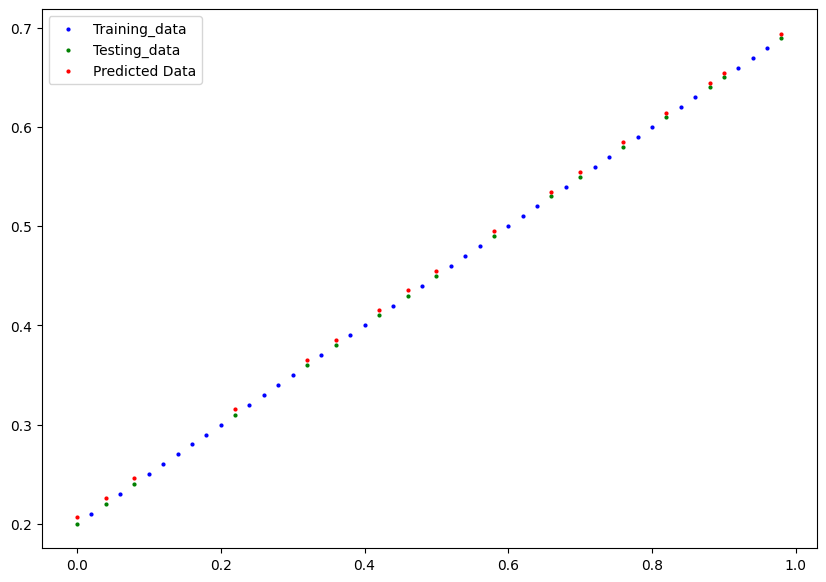

In [84]:
loaded_model_2.to(device)
loaded_model_2.eval()

with torch.inference_mode():
  y_pred = loaded_model_2(X_test)

y_pred_cpu = y_pred.cpu().numpy()
plot_pred(train_data=X_train.cpu().numpy(),y_train=y_train.cpu().numpy(),test_data=X_test.cpu().numpy(), y_test=y_test.cpu().numpy(),predictions=y_pred_cpu)